## Analysis to run

In [120]:
'''
# 1) Cut of hate crime over 2020 by district top by counts  - done
2) Cut of hate crime by law code type, what is the highest in the city
3) Highest type of crime over time - pick the top one  - done
4) 6 month change over the year delta, top 5 
5) Top Bias types
6) Longest time to report a crime
'''

'\n# 1) Cut of hate crime over 2020 by district top by counts  - done\n2) Cut of hate crime by law code type, what is the highest in the city\n3) Highest type of crime over time - pick the top one  - done\n4) 6 month change over the year delta, top 5 \n5) Top Bias types\n6) \n'

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [122]:
main = pd.read_csv('NYPD_Hate_Crimes.csv')
main_copy = main.copy()

In [123]:
main.head()

,Full Complaint ID,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Other Motive Description,Arrest Date,Arrest Id
0,201904600132799,2019,2,02/08/2019,46,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-MALE HOMOSEXUAL(GAY),Sexual Orientation,NaN,02/08/2019,B19606200
1,201904800157499,2019,3,03/09/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,NaN,03/09/2019,B19610772
2,201904800154599,2019,3,03/08/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,NaN,03/09/2019,B19610788
3,201904800159299,2019,3,03/10/2019,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,NaN,03/09/2019,B19610788
4,201904200333499,2019,5,05/11/2019,42,PATROL BORO BRONX,BRONX,FELONY,ROBBERY,"ROBBERY,POCKETBOOK/CARRIED BAG",ANTI-ISLAMIC(MUSLIM),Religion/Religious Practice,NaN,05/10/2019,B19620156


## Slim the data down to 2020 and clean up data we are using

In [124]:
main = main[main['Complaint Year Number'] == 2020]

In [125]:
main = main[['Month Number',
             'Record Create Date',
             'Patrol Borough Name',
             'County',
             'Law Code Category Description',
             'Bias Motive Description',
             'Offense Category',
             'Arrest Date']]

In [126]:
main.rename(columns={'Month Number': 'Month',
                     'Patrol Borough Name': 'Borough',
                     'Law Code Category Description': 'Crime Type',
                     'Bias Motive Description': 'Bias'}, inplace=True)

In [127]:
main.head()

,Month,Record Create Date,Borough,County,Crime Type,Bias,Offense Category,Arrest Date
13,2,02/06/2020,PATROL BORO BRONX,BRONX,MISDEMEANOR,ANTI-MALE HOMOSEXUAL(GAY),Sexual Orientation,02/06/2020
14,3,03/28/2020,PATROL BORO BRONX,BRONX,FELONY,ANTI-ASIAN,Race/Color,03/28/2020
15,3,03/28/2020,PATROL BORO BRONX,BRONX,FELONY,ANTI-ASIAN,Race/Color,03/28/2020
16,3,03/28/2020,PATROL BORO BRONX,BRONX,FELONY,ANTI-ASIAN,Race/Color,03/28/2020
17,4,04/12/2020,PATROL BORO BRONX,BRONX,FELONY,ANTI-JEWISH,Religion/Religious Practice,04/29/2020


## Bargraph of crime by borough

In [128]:
crimes_by_burough = main[['Borough', 'Offense Category']] 

<AxesSubplot:xlabel='Borough'>

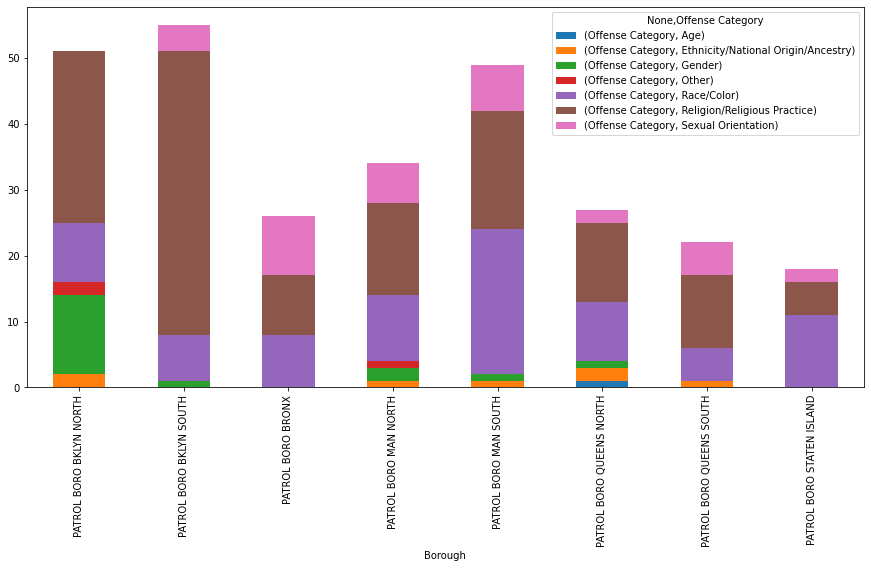

In [129]:
crimes_by_burough.groupby(['Borough', 'Offense Category']).agg({'Offense Category': 'count'}).unstack().plot(kind='bar', stacked=True, figsize = (15,7))

## Top 5 Borough Crime Distribution

In [130]:
ranked_borough_by_crime = main.groupby('Borough', as_index=False).agg({"Bias": "count"}).rename(columns={'Bias': 'Crime Count'}).sort_values('Crime Count', ascending=False)
ranked_borough_by_crime_top = ranked_borough_by_crime.head(5)
ranked_borough_by_crime_top.head()

,Borough,Crime Count
1,PATROL BORO BKLYN SOUTH,55
0,PATROL BORO BKLYN NORTH,51
4,PATROL BORO MAN SOUTH,49
3,PATROL BORO MAN NORTH,34
5,PATROL BORO QUEENS NORTH,27


<AxesSubplot:>

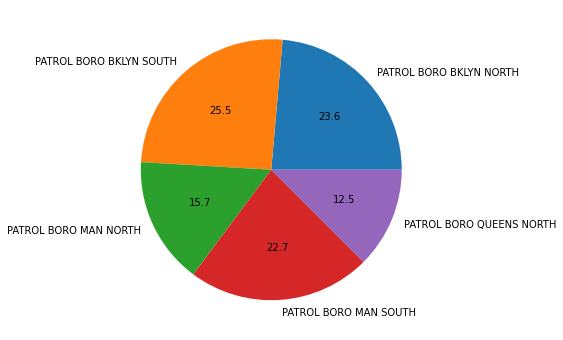

In [131]:
# Take the top 5 from above, use it to get all our lines from main data source and graph that beautiful data
main[main['Borough'].isin(list(ranked_borough_by_crime_top['Borough']))].groupby(['Borough']).size().plot.pie(figsize=(6, 6), ylabel='', autopct="%.1f",)

## Highest crime over the year - trend

In [132]:
# Rack and stack crime types, sort by count, pull top value off to use later
highest_crime_type = main.groupby('Offense Category', as_index=False).agg({"Borough": "count"}).sort_values('Borough',ascending=False).head(1)
highest_crime_type_key = highest_crime_type['Offense Category'].iloc[0]
print(highest_crime_type_key)
highest_crime_df = main[main['Offense Category'] == highest_crime_type_key]
highest_crime_df.head()

Religion/Religious Practice


,Month,Record Create Date,Borough,County,Crime Type,Bias,Offense Category,Arrest Date
17,4,04/12/2020,PATROL BORO BRONX,BRONX,FELONY,ANTI-JEWISH,Religion/Religious Practice,04/29/2020
80,1,01/01/2020,PATROL BORO BKLYN NORTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,01/01/2020
81,1,01/21/2020,PATROL BORO BKLYN SOUTH,KINGS,MISDEMEANOR,ANTI-JEWISH,Religion/Religious Practice,01/21/2020
83,2,02/08/2020,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,02/11/2020
84,2,02/28/2020,PATROL BORO BKLYN NORTH,KINGS,MISDEMEANOR,ANTI-JEWISH,Religion/Religious Practice,02/28/2020


<AxesSubplot:>

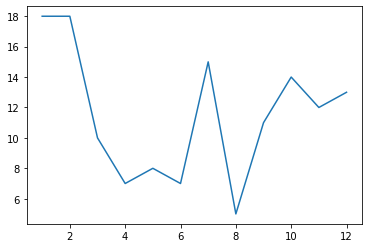

In [133]:
#Now Plot it out ... East side walk it out, west side walk it out...UNK say Plot it out!!!
highest_crime_df['Month'].value_counts().sort_index().plot()

## Who is impacted most by this crime?

In [134]:
highest_crime_df.head()

,Month,Record Create Date,Borough,County,Crime Type,Bias,Offense Category,Arrest Date
17,4,04/12/2020,PATROL BORO BRONX,BRONX,FELONY,ANTI-JEWISH,Religion/Religious Practice,04/29/2020
80,1,01/01/2020,PATROL BORO BKLYN NORTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,01/01/2020
81,1,01/21/2020,PATROL BORO BKLYN SOUTH,KINGS,MISDEMEANOR,ANTI-JEWISH,Religion/Religious Practice,01/21/2020
83,2,02/08/2020,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,02/11/2020
84,2,02/28/2020,PATROL BORO BKLYN NORTH,KINGS,MISDEMEANOR,ANTI-JEWISH,Religion/Religious Practice,02/28/2020


In [135]:
most_impacted_group = highest_crime_df.groupby('Bias').agg({'Crime Type': 'count'}).sort_values(by=['Crime Type'], ascending=False).index[0]
print(most_impacted_group)

ANTI-JEWISH


## Where?

In [136]:
main.head()

,Month,Record Create Date,Borough,County,Crime Type,Bias,Offense Category,Arrest Date
13,2,02/06/2020,PATROL BORO BRONX,BRONX,MISDEMEANOR,ANTI-MALE HOMOSEXUAL(GAY),Sexual Orientation,02/06/2020
14,3,03/28/2020,PATROL BORO BRONX,BRONX,FELONY,ANTI-ASIAN,Race/Color,03/28/2020
15,3,03/28/2020,PATROL BORO BRONX,BRONX,FELONY,ANTI-ASIAN,Race/Color,03/28/2020
16,3,03/28/2020,PATROL BORO BRONX,BRONX,FELONY,ANTI-ASIAN,Race/Color,03/28/2020
17,4,04/12/2020,PATROL BORO BRONX,BRONX,FELONY,ANTI-JEWISH,Religion/Religious Practice,04/29/2020


In [137]:
worst_offending_area = main[main['Bias'] == most_impacted_group].groupby(['Borough']).agg({'Bias':'count'}).sort_values(by=['Bias'], ascending=False).index[0]
print(worst_offending_area)

PATROL BORO BKLYN SOUTH


## Has this changed during covid?

In [138]:
def sorting_for_worst_offending_area_group(row):
    if row['Borough'] == worst_offending_area and row['Bias'] == most_impacted_group:
        return 1
    else:
        return 0

In [139]:
change_analysis = main.copy()

In [140]:
change_analysis['check'] = main.apply(sorting_for_worst_offending_area_group, axis =1)

In [141]:
change_analysis = change_analysis[change_analysis['check'] == 1]

In [143]:
change_analysis.drop(columns=['check'], inplace=True, axis = 0)

In [145]:
h1 = change_analysis[change_analysis['Month'] <= 6]
h2 = change_analysis[change_analysis['Month'] >= 6]

### Check for potentially off data

In [146]:
def cleaner(remove_index, df):
    for line in remove_index:
        df.drop(line, axis=0, inplace=True)

In [147]:
# clean up any outlier data that seems sus
h1_drop_lines = list(h1[pd.to_datetime(h1['Record Create Date']) < dt.datetime(2020, 1, 1)].index)
cleaner(h1_drop_lines, h1)

In [152]:
#Remove the potential bad lines aka maybe data corruption
h2_drop_lines = list(h2[pd.to_datetime(h2['Record Create Date']) < dt.datetime(2020, 6, 1)].index)
cleaner(h2_drop_lines, h2)

/Users/rjasinski/py3/lib/python3.7/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Have asians been impacted?

## How has the worst offending crime area faired over the year?

In [16]:
highest_crime_df.

,Month,Record Create Date,Borough,County,Crime Type,Bias,Offense Category,Arrest Date
17,4,04/12/2020,PATROL BORO BRONX,BRONX,FELONY,ANTI-JEWISH,Religion/Religious Practice,04/29/2020
80,1,01/01/2020,PATROL BORO BKLYN NORTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,01/01/2020
81,1,01/21/2020,PATROL BORO BKLYN SOUTH,KINGS,MISDEMEANOR,ANTI-JEWISH,Religion/Religious Practice,01/21/2020
83,2,02/08/2020,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,02/11/2020
84,2,02/28/2020,PATROL BORO BKLYN NORTH,KINGS,MISDEMEANOR,ANTI-JEWISH,Religion/Religious Practice,02/28/2020
